# Locally Weighted Linear Regression using closed form solution: 
        Locally weighted linear regression is a non-parametric algorithm, that is, the model does not learn a fixed set of
        parameters as is done in ordinary linear regression.Rather parameters  are computed individually for each query
        point.While computing , a higher “preference” is given to the points in the training set lying in the vicinity of
        the points lying far away from . 

In [120]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [171]:
x,y = make_regression(n_samples = 100,n_features = 1,noise = 12)
print(x.shape,y.shape)

(100, 1) (100,)


In [217]:
#normalise
X = (x - x.mean())/x.std()
Y = y**3

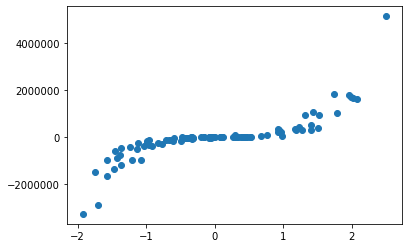

In [218]:
plt.scatter(X,Y)
plt.show()

In [219]:
ones = np.ones((X.shape[0],1))
X1 = np.hstack((ones,X))

In [220]:
def predict(x,theta):
    return theta[0] + x*theta[1]
    

def weight_matrix(x,X):
    m = X.shape[0]
    weight = np.zeros((m,m))
    for i in range(m):
        answer = math.exp((-(x-X[i])**2)/(2*(0.5**2)))
        weight[i][i] = answer
    return weight
#theta = (((X.T)*W*X)**-1)*((X.T)*W*Y)
def get_theta(W,X,Y):
    #W = np.array(weight_matrix(x,X))
    Y = Y.reshape((-1,1))
    Y = np.mat(Y)
    value = np.dot(X.T,W)
    first_value = np.dot(value,X)
    #print(first_value.shape)
    
    second_value = np.dot(value,Y)
    #print(second_value.shape)
    
    theta = np.linalg.pinv(first_value)*second_value
    return theta
    
                

In [221]:
W = weight_matrix(2,X)
print(W.shape)

(100, 100)


In [222]:
theta = get_theta(W,X1,Y)
theta

matrix([[-2412829.70825825],
        [ 2226289.4222328 ]])

In [223]:
predict([2],theta)

matrix([[2039749.13620736]])

In [224]:
test = np.linspace(-2,2,10)
results = np.zeros(test.shape[0])
for i in range(test.shape[0]):
    weight_array = weight_matrix(test[i],X)
    theta_i = get_theta(weight_array,X1,Y)
    #theta_i = np.array(theta_i)
    results[i] = predict(test[i],theta_i)


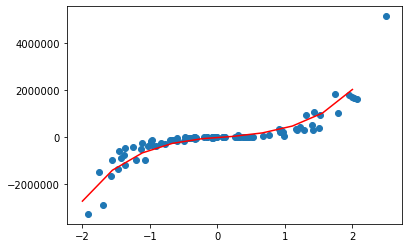

In [225]:
plt.scatter(X,Y)
plt.plot(test,results,color = 'red')